In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

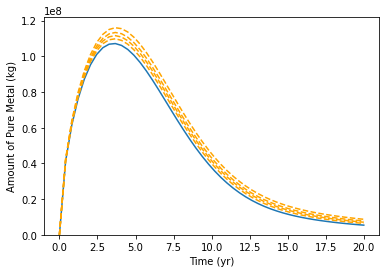

In [2]:
# Model
def model(y,t,p,alpha,gamma,eta,k,B0,beta,A0,w):
    B=B0 + beta*t + A0*np.sin(w*t)
    dydt = p/(0.1+t**0.5) - alpha*(1-gamma*eta)*B - k*y*t
    return dydt

# initial condition
y0 = 10e+3

# time points
t = np.linspace(0,20)

# parameters
p=50000e+3   # rate of metal production + import
alpha=0.010   # amount of metal used for battery manufacturing per unit time
gamma=0   # efficiency of recycling process
eta=0.5   # fraction of batteries recycled per unit time
k=0.05   # rate constant controlling the non-battery usage
B0=60e+7   # total number of batteries at t=0
beta=10e+5   # increase in the total number of batteries per unit time
A0=1e+5  # variation in the total number of batteries per unit time
w=2   # frequency of oscillation (related to demand of new batteries)

# solve ODE
y1 = odeint(model,y0,t,args=(p,alpha,gamma,eta,k,B0,beta,A0,w))

gamma=0.3
y2 = odeint(model,y0,t,args=(p,alpha,gamma,eta,k,B0,beta,A0,w))

gamma=0.5
y3 = odeint(model,y0,t,args=(p,alpha,gamma,eta,k,B0,beta,A0,w))

gamma=0.7
y4 = odeint(model,y0,t,args=(p,alpha,gamma,eta,k,B0,beta,A0,w))

gamma=1
y5 = odeint(model,y0,t,args=(p,alpha,gamma,eta,k,B0,beta,A0,w))

# plot results
plt.plot(t,y1)
plt.plot(t,y2,c='orange',ls='--')
plt.plot(t,y3,c='orange',ls='--')
plt.plot(t,y4,c='orange',ls='--')
plt.plot(t,y5,c='orange',ls='--')
plt.xlabel('Time (yr)')
plt.ylabel('Amount of Pure Metal (kg)')
plt.ylim(bottom=0);

# plt.arrow(15, 500, 0, 3000, width=0.1, head_width=0.5, head_length=100, fc='k', ec='k',alpha=0.5)
# plt.annotate('Efficiency',(11,1500))
# plt.annotate('0 %',(13,500))
# plt.annotate('100 %',(12,3500));

Text(0, 0.5, 'Metal Recovery (kg)')

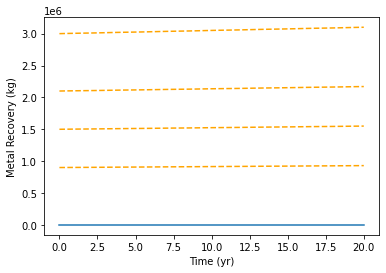

In [3]:
t = np.linspace(0,20)
B=B0 + beta*t + A0*np.sin(w*t)

plt.plot(t,alpha*0*eta*B)
for gamma in [0.3,0.5,0.7,1]:
    plt.plot(t,alpha*gamma*eta*B,c='orange',ls='--')

plt.xlabel('Time (yr)')
plt.ylabel('Metal Recovery (kg)')

# plt.arrow(15, 10, 0, 280, width=0.1, head_width=0.5, head_length=10, fc='k', ec='k',alpha=0.5)
# plt.annotate('Efficiency',(11,150))
# plt.annotate('0 %',(13,15))
# plt.annotate('100 %',(12,250));

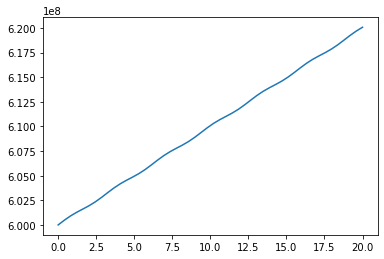

In [4]:
t = np.linspace(0,20)
B=B0 + beta*t + A0*np.sin(w*t)

plt.plot(t,B)